# Pandas Stack/Unstack Pivot Crosstab

Creating a robust prediction engine starts with creating a right data. Creating the response variable, derive a new variable, data processiong, data visualization. Most of the times you will not get a modelling ready data 


The pivot function is used to create a new derived table out of a given one. Pivot takes 3 arguements with the following names: index, columns, and values. As a value for each of these parameters you need to specify a column name in the original table. Then the pivot function will create a new table, whose row and column indices are the unique values of the respective parameters. The cell values of the new table are taken from column given as the values parameter.
Stack, Unstack, Pivot_table, CrossTab really helps in this whole process

Prerequisites

For a better understanding of pandas index, read my first article on pandas index explained
Our exercise dataset can be downloaded directly with pandas help from uci ml data repository <br>
Dataset Name: Adult 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

We will be using the UCI Machine Learning Adult Dataset, the following notebook has the script to download the data.
Business Problem: Classification (a person earns more than 50k or less) Predictor Variable: Label ; Predictors: country, age, education, occupation, marital status etc.

Taking the same example from the last exercise. 

In [2]:
adult  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                  names = ['age', 'workclass','fnlwgt', 'education', 'education_num','marital_status', 
                         'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss',
                         'hours_per_week', 'native_country','label'], index_col = False)

print("Shape of data{}".format(adult.shape))
adult.head()

Shape of data(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As seen above, Some of the features are age, workclass, education, marital_status, race, sex, native_country, hours_per_week and response feature label. Also will replace label values <=50K, >50K by 0 and 1 respectively.

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
print("Unique values of label before replacement {}".format(adult['label'].unique()))
adult['label_50']= np.where(adult['label']==' <=50K', 0, 1) #replacement of label values
print("label values count after replacement\n{}".format(adult['label_50'].value_counts()))

Unique values of label before replacement [' <=50K' ' >50K']
label values count after replacement
0    24720
1     7841
Name: label_50, dtype: int64


Our dataset is a well structred dataframe, Bi-variate analysis explains and validate the relatinship between features. And categorical features need groupby and apply functions to understand their relationhsip with numeric and other categorical variables.

In this context Pandas Pivot, Stack/ Unstack & Crosstab methods give a solid base

## Pivot_table

Usually earnings are frequently associated with occupation. So, let's pivot the occupation and see which occupations have high earning people.

                       sum        
sex                 Female    Male
occupation                        
 ?                    52.0   139.0
 Adm-clerical        212.0   295.0
 Armed-Forces          NaN     1.0
 Craft-repair         20.0   909.0
 Exec-managerial     280.0  1688.0
 Farming-fishing       2.0   113.0
 Handlers-cleaners     4.0    82.0
 Machine-op-inspct    20.0   230.0
 Other-service        51.0    86.0
 Priv-house-serv       1.0     0.0
 Prof-specialty      385.0  1474.0
 Protective-serv      10.0   201.0
 Sales                88.0   895.0
 Tech-support         45.0   238.0
 Transport-moving      9.0   311.0


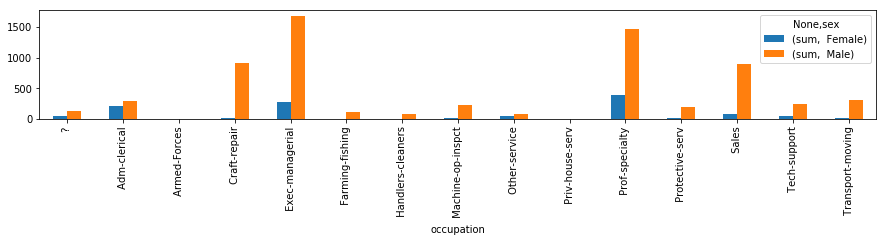

In [7]:
pt = adult.pivot_table(index = 'occupation', columns ='sex', values = 'label_50', aggfunc=['sum'])
print(pt)
pt.plot(kind ='bar', figsize=(15,2));

Exec Managerial, Prof-speciality and sales has highest number of male and female earn more than 50K. It may be one imp feature, we should validate it later <br>
Multiple columns can also be used during pivoting, we can use pivot_table like following. sum is adding all 1 value of label_50 and size is simple count of values, thats why it is same for education and label_50.

For multiple aggregation functions:-
adult.pivot_table(index = 'occupation', columns =['sex','occupation'] , values = ['label_50','education'], 
                  aggfunc={'label_50': sum,'education':sum}).head(5)

In [50]:
pt= adult.pivot_table(index = 'occupation', columns =['marital_status','sex'] , values='label_50', 
                  aggfunc='sum')
pt.head(5)

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

**As per our last exercise, see the index and columns of this pivot table**

In [51]:
pt.index

Index([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'],
      dtype='object', name='occupation')

In [52]:
pt.columns

MultiIndex(levels=[[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'], [' Female', ' Male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['marital_status', 'sex'])

**Multiindex columns can be reduced while we rename our columns like following**

In [55]:
pt_copy=pt.copy()
pt_copy.columns=pt_copy.columns.map('_'.join)
pt_copy.head()

,Divorced_ Female,Divorced_ Male,Married-AF-spouse_ Female,Married-AF-spouse_ Male,Married-civ-spouse_ Female,Married-civ-spouse_ Male,Married-spouse-absent_ Female,Married-spouse-absent_ Male,Never-married_ Female,Never-married_ Male,Separated_ Female,Separated_ Male,Widowed_ Female,Widowed_ Male
occupation,,,,,,,,,,,,,,
?,4.0,2.0,0.0,NaN,42.0,129.0,0.0,1.0,2.0,7.0,0.0,0.0,4.0,0.0
Adm-clerical,15.0,11.0,1.0,0.0,171.0,264.0,1.0,1.0,17.0,16.0,1.0,2.0,6.0,1.0
Armed-Forces,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Craft-repair,7.0,38.0,1.0,1.0,10.0,823.0,0.0,4.0,2.0,33.0,0.0,6.0,0.0,4.0
Exec-managerial,66.0,77.0,1.0,NaN,155.0,1511.0,3.0,5.0,42.0,70.0,3.0,16.0,10.0,9.0


They can be joined back anytime in the real data to add a feature

## Crosstab
pd.crosstab can be used just like  pivot_table, but it computes a simple cross-tabulation of two (or more) categorical features. 
By default it computes a frequency table of the categorical features, since values are not mandatory for crosstab, but values and aggregation function can be passed, if required.<br>
Let's look at a simple example of crosstab and plot it. Education is also one important factor in earning.

In [26]:
print("Simple frequncy table of education and sex \n\n{}".format(pd.crosstab(index = adult.education,
                                                                         columns = adult.sex).head(20)))

Simple frequncy table of education and sex 

sex             Female   Male
education                    
 10th              295    638
 11th              432    743
 12th              144    289
 1st-4th            46    122
 5th-6th            84    249
 7th-8th           160    486
 9th               144    370
 Assoc-acdm        421    646
 Assoc-voc         500    882
 Bachelors        1619   3736
 Doctorate          86    327
 HS-grad          3390   7111
 Masters           536   1187
 Preschool          16     35
 Prof-school        92    484
 Some-college     2806   4485


Crosstab can be used just like pivot_table, if values and aggregation parameters. Following is a Bar plot of people earn more than 50K across education and sex(male/female) features

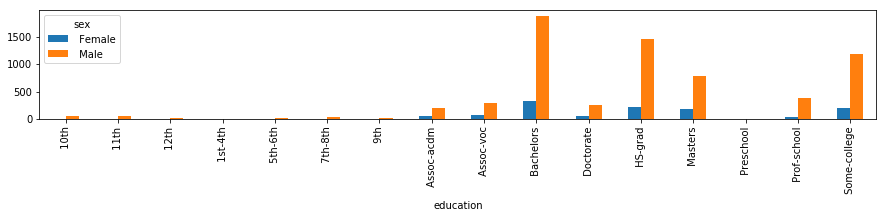

In [27]:
pd.crosstab(index = adult.education,columns = adult.sex, values = adult.label_50, 
            aggfunc='sum').plot(kind ='bar',figsize=(15,2));

Despite of highest female in HS_grad, the highest feamle earners are bachelors <br>
pd.cross tab has a parameter Normalized. While we do bivariate analysis, frequency tables can also be normalized to show percentages rather than counts, percentages are used in statistical tests to validate are assumptions:

In [29]:
pd.crosstab(adult.education,adult.label_50, normalize = True)

label_50,0,1
education,,
10th,0.026750,0.001904
11th,0.034243,0.001843
12th,0.012285,0.001013
1st-4th,0.004975,0.000184
5th-6th,0.009736,0.000491
7th-8th,0.018611,0.001228
9th,0.014957,0.000829
Assoc-acdm,0.024631,0.008139
Assoc-voc,0.031357,0.011087


## Stack Unstack

Stacking a DataFrame means moving the innermost column index to become the innermost row index. The inverse operation is called unstacking.<br>
What is Stacking? - If we have multiple-index columns and we reduce dataset columns by moving innermost column level to innermost row level. So stack is cols to rows(innermost) <br>
What is Unstacking?- If we have multiple-index rows and we reduce dataset rows by moving innermost row level to innermost column level. So stack is rows to cols(innermost) <br>
Also, stack can be called with a 'level' parameter to select which level in the columns to stack:<br>
In our downloaded data, we don't have any multiple indexes, but our pivoted dataset has multiple indexes

In [56]:
pt.head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

On pivoted data, stack moved the inner level column to inner level rows and unstacking it again brought it back to the original pivot shape

In [57]:
pt.stack().head()

marital_status          Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation    sex                                                           
 ?             Female        4.0                 0.0                 42.0   
               Male          2.0                 NaN                129.0   
 Adm-clerical  Female       15.0                 1.0                171.0   
               Male         11.0                 0.0                264.0   
 Armed-Forces  Male          NaN                 NaN                  1.0   

marital_status          Married-spouse-absent   Never-married   Separated  \
occupation    sex                                                           
 ?             Female                     0.0             2.0         0.0   
               Male                       1.0             7.0         0.0   
 Adm-clerical  Female                     1.0            17.0         1.0   
               Male                       1.0            16.0         2.0   
 Armed-Forces  Male                       NaN             0.0         NaN   

marital_status          Widowed  
occupation    sex                
 ?             Female       4.0  
               Male         0.0  
 Adm-clerical  Female       6.0  
               Male         1.0  
 Armed-Forces  Male         NaN

In [59]:
pt.stack().unstack().head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

Stacking/Unstacking is possible at differnt levels directly with parameter level

In [58]:
pt.stack(level =1).head(10)

marital_status             Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation       sex                                                           
 ?                Female        4.0                 0.0                 42.0   
                  Male          2.0                 NaN                129.0   
 Adm-clerical     Female       15.0                 1.0                171.0   
                  Male         11.0                 0.0                264.0   
 Armed-Forces     Male          NaN                 NaN                  1.0   
 Craft-repair     Female        7.0                 1.0                 10.0   
                  Male         38.0                 1.0                823.0   
 Exec-managerial  Female       66.0                 1.0                155.0   
                  Male         77.0                 NaN               1511.0   
 Farming-fishing  Female        1.0                 NaN                  0.0   

marital_status             Married-spouse-absent   Never-married   Separated  \
occupation       sex                                                           
 ?                Female                     0.0             2.0         0.0   
                  Male                       1.0             7.0         0.0   
 Adm-clerical     Female                     1.0            17.0         1.0   
                  Male                       1.0            16.0         2.0   
 Armed-Forces     Male                       NaN             0.0         NaN   
 Craft-repair     Female                     0.0             2.0         0.0   
                  Male                       4.0            33.0         6.0   
 Exec-managerial  Female                     3.0            42.0         3.0   
                  Male                       5.0            70.0        16.0   
 Farming-fishing  Female                     1.0             0.0         0.0   

marital_status             Widowed  
occupation       sex                
 ?                Female       4.0  
                  Male         0.0  
 Adm-clerical     Female       6.0  
                  Male         1.0  
 Armed-Forces     Male         NaN  
 Craft-repair     Female       0.0  
                  Male         4.0  
 Exec-managerial  Female      10.0  
                  Male         9.0  
 Farming-fishing  Female       0.0

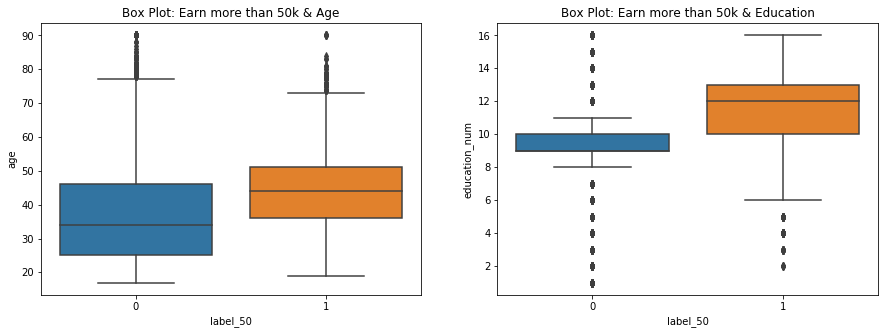

In [46]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) # not add axs while defining 
## plotting
sns.boxplot(x = adult.label_50, y = adult.age, ax = ax1).set_title('Box Plot: Earn more than 50k & Age');
sns.boxplot(x = adult.label_50, y = adult.education_num, ax = ax2).set_title('Box Plot: Earn more than 50k & Education');

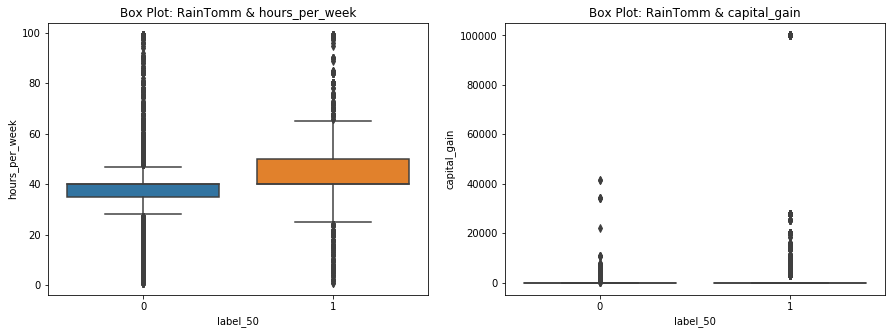

In [49]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5)) # not add axs while defining 

sns.boxplot(x = adult.label_50, y = adult.hours_per_week, ax = ax1).set_title('Box Plot: RainTomm & hours_per_week');
sns.boxplot(x = adult.label_50, y = adult.capital_gain, ax = ax2).set_title('Box Plot: RainTomm & capital_gain');